# Dark Matter in M31  ..  the story in 1970 (Rubin & Ford)

Although [Fritz Zwicky](https://en.wikipedia.org/wiki/Fritz_Zwicky), in 1933, already had indications that things did not add up, and he coined the term *dunkle Materie* (Dark Matter, in German, he is from Swiss origin), it took another 20+ years before the astronomical community realized he was right.  Zwicky's work was based on the motions of galaxies in clusters, but it was the work of Roberts, Rubin, Bosma and many others that solidified that in galaxies themselves there was an equal problem of "missing matter", which we now call Dark Matter.

In this notebook we will take the original data from Rubin & Ford's 1970 paper and derive a rotation curve.

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
m31_data = './m31-rubin.tab'

read this data (x,y,vobs,weight)
and plot just the (x,y) positions on the sky. Units are arcmin and km/s. Recall the diameter of the moon is about 30 arcmin.  M31 is large!


In [ ]:
(x,y,vobs,wt) = np.loadtxt(m31_data).T 

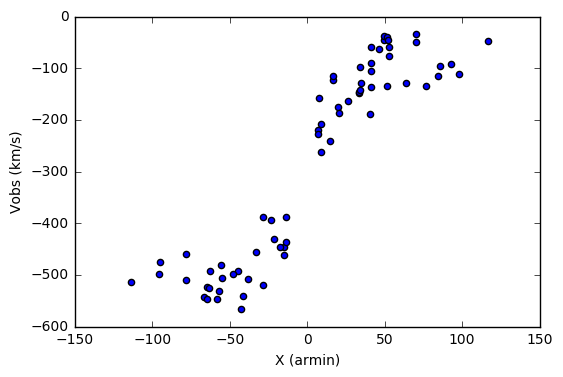

In [18]:
plt.scatter(x,vobs)
plt.xlabel('X (arcmin)')
plt.ylabel('Vobs (km/s)')

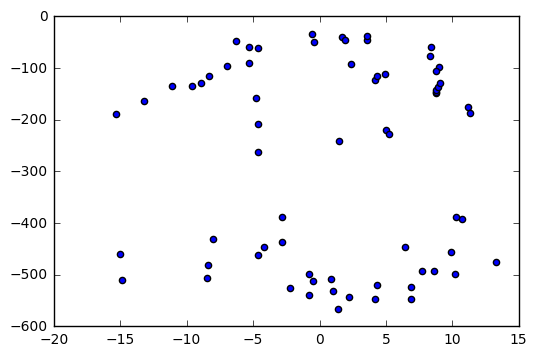

In [12]:
plt.scatter(y,vobs)
plt.xlabel('Y (arcmin)')
plt.ylabel('Vobs (km/s)')

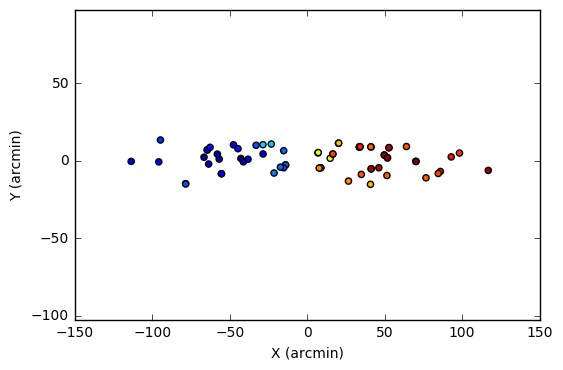

In [19]:
plt.scatter(x,y,c=vobs)
plt.axis('equal')
plt.xlabel('X (arcmin)')
plt.ylabel('Y (arcmin)')

The figure has X along the major axis, and Y along the minor axis, but these are rotated along the sky,because the position angle of the galaxy is not 90 degrees.


In [32]:
pa = 32.0           # 0 means north up, positive is counting east (counter clock wise)
inc = 77.0          # 90 is edge on, 0 is face on
vc = -300.0         # systemic velocity (km/s)
distance = 670.0    # kpc

Now produce the same plot rotated how it should look on the sky and compare with the figure we took from the published paper.

Now produce the rotation speed, assuming all measurements are from the same plane and are on circular orbits, as function of a deprojected X. This would be rotation curve on both the negative and positive X' axis.

$$
    V_{obs} = V_{sys} + V_{rot} * \sin{i} * \cos{\Theta}
$$
where
$$
    \tan{\Theta} = {\tan{\phi} \over \cos{i}}
$$
with $\Theta$ is in the plane of the galaxy, and $\phi$ in the plane of the sky.


In [39]:
cosi = math.cos(inc*math.pi/180.0)
sini = math.cos(inc*math.pi/180.0)
#
xs = x
ys = y/cosi
tan_t = ys/xs
cos_t = 1.0/np.sqrt(1+tan_t*tan_t)
vrots = (vobs-vc) / cos_t / sini
rs = np.sqrt(xs*xs + ys*ys) * np.sign(xs)
#

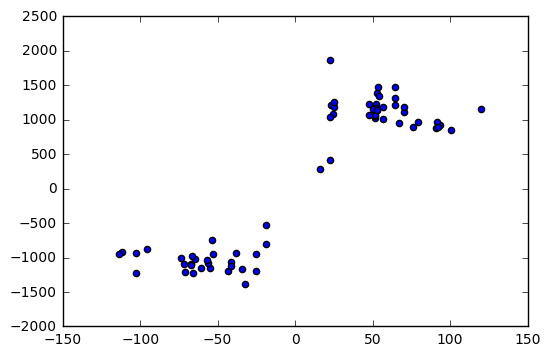

In [40]:
plt.scatter(rs,vrots)

Fold it over, and plot a single rotation curve as function of radius. Convert the radius to kpc from the original arcmin based on the distance.

In [41]:
vrot = np.abs(vrots)
r = np.abs(rs)

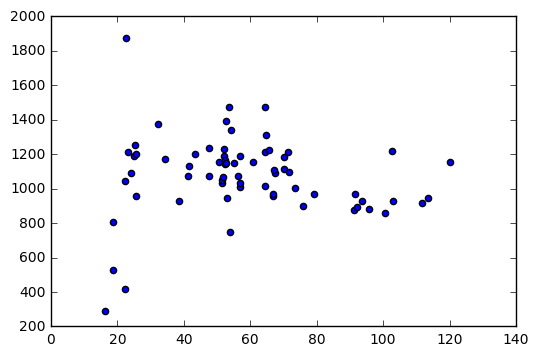

In [42]:
plt.scatter(r,vrot)